In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [26]:
data_test = pd.read_csv('dataset/blood_test.csv')
data = pd.read_csv('dataset/Blood_train.csv')

In [84]:
data_test_droped  = data_test[data_test['Disease'] != 'Heart Di']

In [86]:
data_test_droped['Disease'].unique()

array(['Thalasse', 'Diabetes', 'Anemia', 'Thromboc', 'Healthy'],
      dtype=object)

In [27]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [28]:
data['Disease'].value_counts(normalize=True)

Disease
Anemia      0.264994
Healthy     0.236495
Diabetes    0.229689
Thalasse    0.216504
Thromboc    0.052318
Name: proportion, dtype: float64

In [29]:
data.shape

(2351, 25)

In [30]:
data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,0.447062,0.436679,0.381211,0.421708,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,0.242861,0.242865,0.232785,0.248768,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,0.034129,0.014596,0.005988,0.005579,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,0.219111,0.246885,0.179951,0.175469,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,0.444806,0.443725,0.359064,0.474378,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,0.654441,0.601662,0.580903,0.663382,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,0.966784,0.898210,0.829100,0.934617,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [31]:
data['Disease'].nunique()

5

In [32]:
data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [87]:
label_encoder = LabelEncoder()

data['Disease_encoded'] = label_encoder.fit_transform(data['Disease'])

In [88]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,Disease_encoded
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy,2
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse,3
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia,0
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse,3


In [89]:
label_encoder.classes_

array(['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc'],
      dtype=object)

In [90]:
lable_mapping = dict(zip(data['Disease'] , data['Disease_encoded']))
lable_mapping

{'Healthy': 2, 'Diabetes': 1, 'Thalasse': 3, 'Anemia': 0, 'Thromboc': 4}

In [91]:
data_test_droped['Disease_encoded'] = label_encoder.transform(data_test_droped['Disease']) 

C:\Users\nihar\AppData\Local\Temp\ipykernel_14512\741806240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_droped['Disease_encoded'] = label_encoder.transform(data_test_droped['Disease'])


In [93]:
lable_mapping1 = dict(zip(data_test_droped['Disease'] , data_test_droped['Disease_encoded']))
lable_mapping1

{'Thalasse': 3, 'Diabetes': 1, 'Anemia': 0, 'Thromboc': 4, 'Healthy': 2}

In [94]:
data_test_droped.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,Disease_encoded
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,0.645755,0.070888,0.616684,0.168031,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse,3
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,0.353929,0.681551,0.498084,0.216581,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes,1
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,0.819216,0.542478,0.023462,0.744379,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes,1
6,0.677636,0.435037,0.572571,0.965847,0.010580,0.753719,0.262138,0.789804,0.541149,0.550569,0.741724,0.835773,0.942370,0.968535,0.884907,0.196416,0.141203,0.355437,0.468168,0.493548,0.213971,0.059427,0.836447,0.231356,Diabetes,1
7,0.105103,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.319864,0.285914,0.857972,0.363073,0.882426,0.874039,0.756753,0.259719,0.305473,0.867800,0.213141,0.094877,0.120487,0.211855,0.376829,0.645990,Diabetes,1


In [62]:
features = [feature for feature in data.columns if feature not in ['Disease' , 'Disease_encoded']]
features

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Creatinine',
 'Troponin',
 'C-reactive Protein']

In [98]:
#X = data[features]
#y = data['Disease_encoded']

X_train = data[features]
y_train = data['Disease_encoded']
X_test = data_test_droped[features]
y_test = data_test_droped['Disease_encoded']

In [69]:
#X_train , X_test , y_train , y_test = train_test_split(X , y , random_state= 42 ,test_size=0.30)

In [96]:
def evaluate_classification_model(model, X_test, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    
    # Compute classification error metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display the metrics
    metrics = pd.Series({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    print("Classification Error Metrics:")
    print(metrics)
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    return metrics


In [99]:
log_reg = LogisticRegression(penalty='l2' , random_state=1032)

In [100]:
log_reg.fit(X_train , y_train)

d:\Projects\Disease_Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1032)

In [73]:
y_pred = log_reg.predict(X_test)

Classification Error Metrics:
Accuracy     0.378076
Precision    0.561273
Recall       0.378076
F1 Score     0.435058
dtype: float64


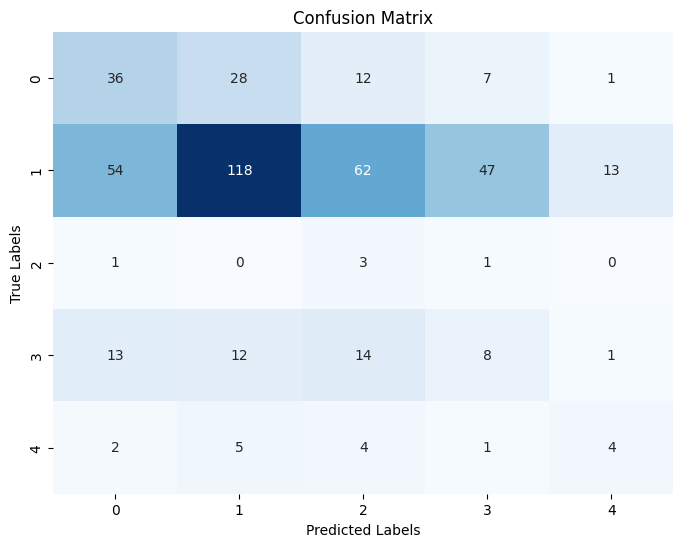

Accuracy     0.378076
Precision    0.561273
Recall       0.378076
F1 Score     0.435058
dtype: float64

In [101]:
evaluate_classification_model(model = log_reg , X_test=X_test  ,y_test=y_test)

In [102]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [103]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

Classification Error Metrics:
Accuracy     0.201342
Precision    0.545857
Recall       0.201342
F1 Score     0.247977
dtype: float64


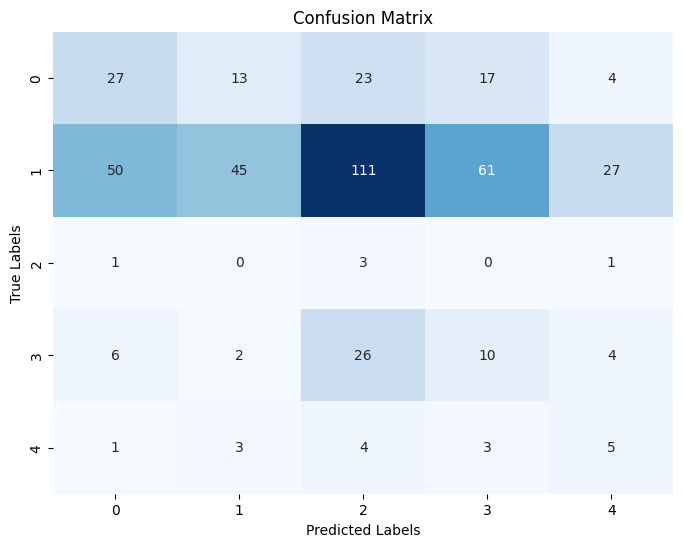

Accuracy     0.201342
Precision    0.545857
Recall       0.201342
F1 Score     0.247977
dtype: float64

In [104]:
evaluate_classification_model(model = knn , X_test=X_test  ,y_test=y_test)